In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error # Import mean_squared_error

In [ ]:
pip install ucimlrepo

In [ ]:
# prompt: do one hot encoding for the Sex Feature

from ucimlrepo import fetch_ucirepo
!pip install ucimlrepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Sex' column
enc.fit(X[['Sex']])

# Transform the 'Sex' column into one-hot encoded features
encoded_sex = enc.transform(X[['Sex']]).toarray()

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# Concatenate the encoded features with the original DataFrame (excluding the original 'Sex' column)
X_encoded = pd.concat([X.drop('Sex', axis=1), encoded_df], axis=1)

# Now X_encoded contains the one-hot encoded 'Sex' feature
print(X_encoded.head())


   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150    0.0    0.0    1.0  
1         0.070    0.0    0.0    1.0  
2         0.210    1.0    0.0    0.0  
3         0.155    0.0    0.0    1.0  
4         0.055    0.0    1.0    0.0  


In [ ]:
X_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [ ]:
df = pd.concat([X_encoded, y], axis=1)

In [ ]:
import numpy as np
import pandas as pd

df = df[(np.abs(df - df.mean()) <= 3 * df.std()).all(axis=1)]

In [ ]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,0.310156,0.328284,0.361559,9.738763
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,0.462615,0.469647,0.480512,2.864691
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,0.000000,0.000000,0.000000,3.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,0.000000,0.000000,0.000000,8.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,0.000000,0.000000,0.000000,9.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,1.000000,1.000000,1.000000,11.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,1.000000,1.000000,1.000000,19.000000


In [ ]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,7


In [ ]:
#X is your features
#y is your target col

X = df.iloc[:, :-1]  # All columns except the last
y = df.iloc[:, -1]   # Only the last column

In [ ]:
# 1. Prepare data
# X: input data
# y: target value (Rings)

# 2. Split data (80% training data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Decision Tree model and training
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# 4. prediction
y_pred = regressor.predict(X_test)

In [ ]:
# 5. Evaluate model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmae = np.sqrt(mae)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Absolute Error (RMAE): {rmae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.15
Mean Absolute Error (MAE): 1.87
Mean Squared Error (MSE): 6.85
Root Mean Absolute Error (RMAE): 1.37
Root Mean Squared Error (RMSE): 2.62


In [ ]:
# 6. Compare actual value and predicted value
result_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(result_df.head(20))

    Actual  Predicted
0        8        8.0
1        9       11.0
2       12       13.0
3       19       18.0
4        7        4.0
5        8        7.0
6        8        9.0
7       13       13.0
8       10       12.0
9        6        8.0
10       9        9.0
11      10       12.0
12       7        5.0
13      11       11.0
14       8        9.0
15       6        7.0
16       9       11.0
17       9       10.0
18      10       11.0
19       9        8.0


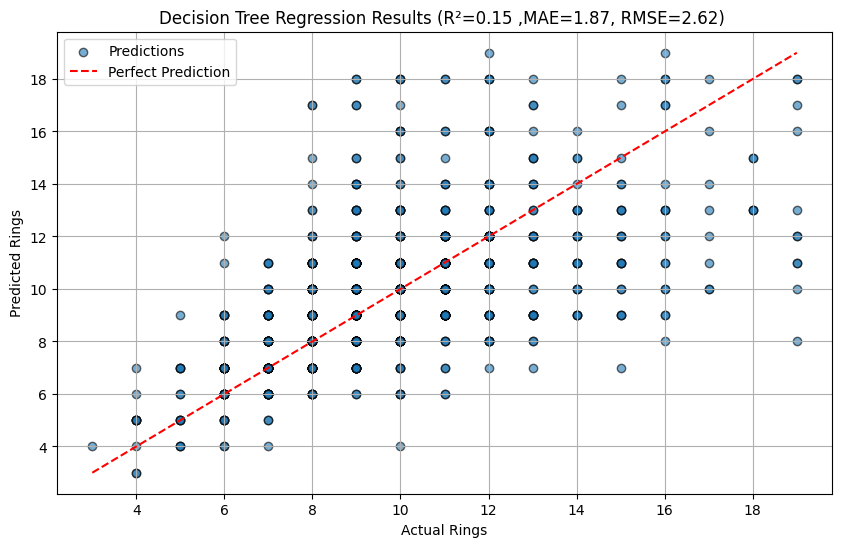

In [ ]:
# 3. Plot Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title(f'Decision Tree Regression Results (R²={r2:.2f} ,MAE={mae:.2f}, RMSE={rmse:.2f}) ')
plt.legend()
plt.grid(True)
plt.show()

Decision tree 간단하게 설명하기-프레젠테이션